In [2]:
%matplotlib inline
from matplotlib import style
style.use('dark_background')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd  
import datetime as dt

In [4]:
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
engine = create_engine("sqlite:///hawaii.sqlite")

In [9]:
Base = automap_base()
Base.prepare(engine, reflect = True)  

In [10]:
Base.classes.keys()

['measurement', 'station']

In [11]:
Measurement = Base.classes.measurement
Station = Base.classes.station

In [12]:
session = Session(engine)

In [22]:
# last data point is 8/23/17
year_before = dt.date(2017, 8, 23) - dt.timedelta(year=1)

results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= year_before).all()

hawaii = pd.DataFrame(results, columns = ['date', 'precipitation'])
hawaii.set_index(hawaii['date'], inplace = True)
hawaii = hawaii.sort_values("date")


hawaii.plot(rot=70)

TypeError: 'year' is an invalid keyword argument for __new__()

In [19]:
# last data point is 8/23/17
year_before = dt.date(2017, 8, 23) - dt.timedelta(days=365)

results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= year_before).all()

df = pd.DataFrame(results, columns = ['date', 'precipitation'])
df.set_index(df['date'], inplace = True)

df = df.sort_values("date")


df.plot(rot=70)


ValueError: 'date' is both an index level and a column label, which is ambiguous.

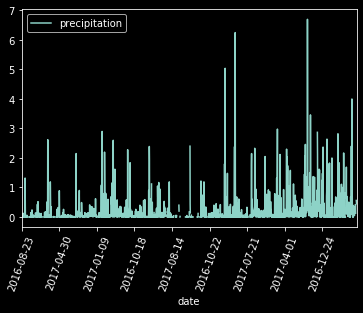

In [23]:
# last data point is 8/23/17
year_before = dt.date(2017, 8, 23) - dt.timedelta(days=365)

results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= year_before).all()

hawaii = pd.DataFrame(results, columns = ['date', 'precipitation'])
hawaii.set_index(hawaii['date'], inplace = True)


hawaii.plot(rot=70)

In [24]:
hawaii.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [25]:
session.query(func.count(Station.station)).all()

[(9)]

In [26]:
session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

Text(0.5, 15.0, 'temp')

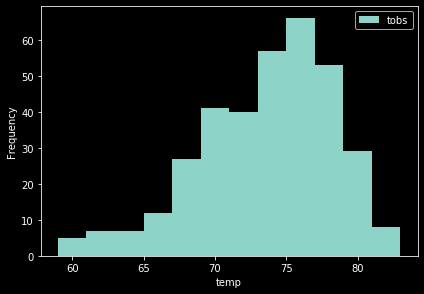

In [27]:
import datetime as dt
from pandas.plotting import table
year_before = dt.date(2017, 8, 23) - dt.timedelta(days=365)

results = session.query(Measurement.tobs).\
    filter(Measurement.station == 'USC00519281').\
    filter(Measurement.date >= year_before).all()
hawaii = pd.DataFrame(results, columns=['tobs'])
hawaii.plot.hist(bins=12)
plt.tight_layout()
plt.xlabel("temp")